In [3]:
# run on top of your notebook
import modelbit
mb = modelbit.login()

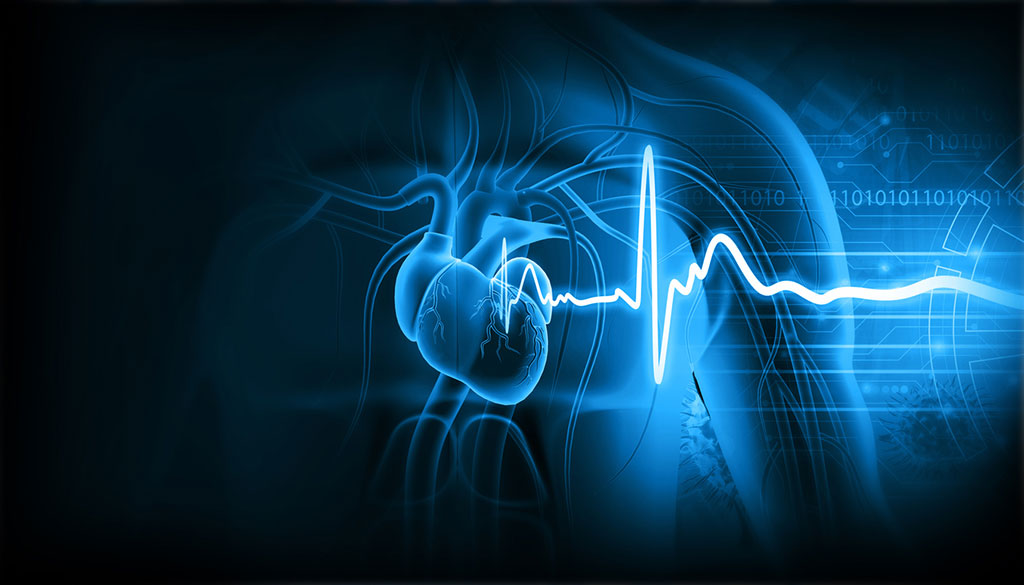


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h3 align="left"><font color=black>Problem:</font></h3>


In this project, we delve into a dataset encapsulating various health metrics from heart patients, including age, blood pressure, heart rate, and more. Our goal is to develop a predictive model capable of accurately identifying individuals with heart disease. Given the grave implications of missing a positive diagnosis, our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric.

<div style="border-radius:10px; padding: 15px; background-color: #FFFF00; font-size:115%; text-align:left">

<h3 align="left"><font color=black>Objectives:</font></h3>

- Explore the Dataset: Uncover patterns, distributions, and relationships within the data.
- Conduct Extensive Exploratory Data Analysis (EDA): Dive deep into bivariate relationships against the target.
- Preprocessing Steps:
     * Remove irrelevant features
     * Address missing values
     * Treat outliers
     * Encode categorical variables
     * Transform skewed features to achieve normal-like distributions
- Model Building:
     * Establish pipelines for models that require scaling
     * Implement and tune classification models including KNN, SVM, Decision Trees, and Random Forest
     * Emphasize achieving high recall for class 1, ensuring comprehensive identification of heart patients
- Evaluate and Compare Model Performance: Utilize precision, recall, and F1-score to gauge models' effectiveness.


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Table of Contents:</font></h3>
    
1. Import required libraries
    

  2. Load the dataset
    

  3. Data Pre-Processing & Feature selection

     <ul><li> Data Cleaning</li></ul>

     <ul><li> Filling Missing values</li></ul>

     <ul><li> Noisy Data</li></ul>

     <ul><li> Removal of outliners</li></ul>

     <ul><li> Transforming categorical variables into numerical variables (or vice versa)</li></ul>
   

  4. Data Visualization

     <ul><li> Bar Chart</li></ul>

     <ul><li> Heat Map</li></ul>

  5. Splitting and Training the data

     <ul><li> 80% → Training Data</li></ul>

     <ul><li> 20% → Testing Data</li></ul>

   
  6. load the model

     <ul><li>fit the training data into the model</li></ul>

    
7. Build the Predictive Model

   
8. Evaluating the model

    <ul><li>If accuracy of model ≥ 75% : thn continue, if not change the algorithm</li></ul>
   

9. Deploy the model
    

  

<h2 align="left"><font color=green>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [7]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score 
from sklearn.tree import plot_tree
import joblib
import seaborn as sns

<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Load the Dataset</p>


In [13]:
# load the dataset
df=pd.read_csv('Downloads\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __age__ | Age of the patient in years |
| __sex__ | Gender of the patient (0 = male, 1 = female) |
| __cp__ | Chest pain type: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic |
| __trestbps__ | Resting blood pressure in mm Hg |
| __chol__ | Serum cholesterol in mg/dl |                     
| __fbs__ | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) |
| __restecg__ | Resting electrocardiographic results: <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy |  
| __thalach__ | Maximum heart rate achieved during a stress test |                      
| __exang__ | Exercise-induced angina (1 = yes, 0 = no) |
| __oldpeak__ | ST depression induced by exercise relative to rest |
| __slope__ | Slope of the peak exercise ST segment: <br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping |                      
| __ca__ | Number of major vessels (0-4) colored by fluoroscopy |              
| __thal__ | Thalium stress test result: <br> 0: Normal <br> 1: Fixed defect <br> 2: Reversible defect <br> 3: Not described  |
| __target__ | Heart disease status (0 = no disease, 1 = presence of disease) |

<a id="overview"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Data Pre-processing & Feature Selection</p>

<a id="feature_removal"></a>
# <b><span style='color:#ff826e'></span><span style='color:red'> Data Cleaning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
•	Data Cleaning: Handles missing values and inconsistencies in the dataset.
    
•	Normalization: Scales numerical features to a consistent range for optimal model performance.


<a id="feature_removal"></a>
# <b><span style='color:#ff826e'></span><span style='color:red'> Filling Missing Values</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

By executing these two steps, the dataset is prepared for further analysis or model training with minimal disruption to its original distribution:

<p> <b>Convert placeholders to NaN:</b></p>

Identifies and marks all missing data points consistently.
    
<p><b>Fill with the median:</b></p>

Ensures missing values are replaced with robust estimates, maintaining the dataset's integrity and distribution.
This approach is effective for preparing datasets for machine learning models or statistical analysis, particularly when the dataset contains numerical features with potential outliers.

<a id="feature_removal"></a>
# <b><span style='color:#ff826e'></span><span style='color:red'> Noisey Data & Removal of Outliers</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

All features in the dataset appear to be relevant based on our __EDA__. No columns seem redundant or irrelevant. Thus, we'll retain all features, ensuring no valuable information is lost, especially given the dataset's small size.

<a id="feature_removal"></a>
# <b><span style='color:#ff826e'></span><span style='color:red'> Transforming categorical variables into numerical variables (or vice versa)</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
    
<p>The process of transforming between categorical and numerical variables involves choosing appropriate methods based on the data's nature and the specific requirements of the machine learning model. Here’s a concise summary of both processes:</p>

<h3>Transforming Categorical to Numerical:</h3>
    
<p><b>Label Encoding:</b></p>

Assigns integers to each category.
    
Suitable for ordinal data.
    
<p><b>One-Hot Encoding:</b></p>

Converts categories into binary columns.
    
Ideal for nominal data.
    
<p><b>Ordinal Encoding:</b><p>

Reflects order with integers.
    
Best for ordered categories.
    
<b>Transforming Numerical to Categorical:</b>
    
<b>Binning/Discretization:</b>

Groups values into intervals.
    
Simplifies data representation.
    
<b>Quantile-based Discretization:</b>

Creates equal-frequency bins.
    
Balances skewed distributions.
    
<b>Custom Mapping:</b>

Manually defines categories.
    
Uses domain knowledge.

In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | Data Visualization</p>


<a id="feature_removal"></a>
# <b><span style='color:#ff826e'></span><span style='color:red'>Bar Charts</span></b>

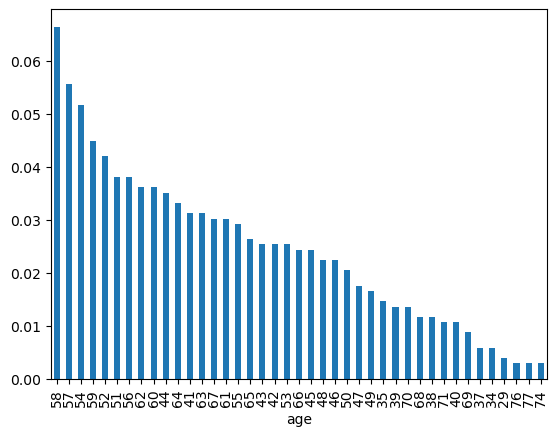

In [16]:
df['age'].value_counts(normalize=True).plot(kind='bar')
plt.show()

C:\Users\gniha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


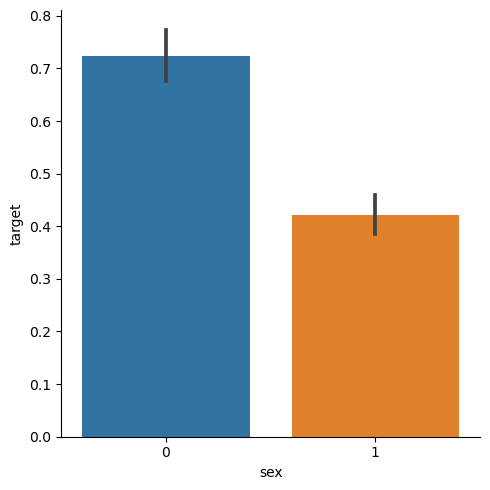

In [17]:
sns.catplot(data=df, y='target', x='sex', kind='bar')
plt.show()

C:\Users\gniha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


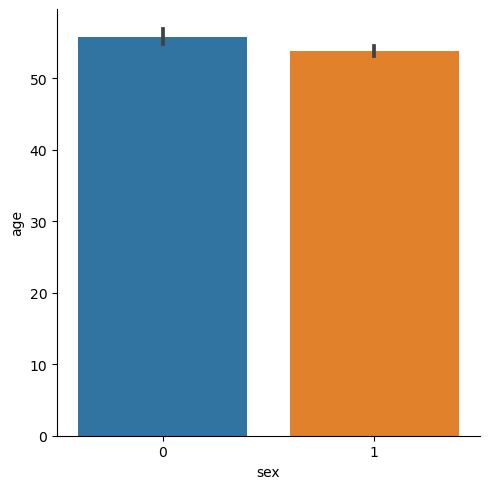

In [18]:
sns.catplot(data=df, y='age', x='sex', kind='bar')
plt.show()

<a id="feature_removal"></a>
# <b><span style='color:#ff826e'></span><span style='color:red'>Heat Map</span></b>

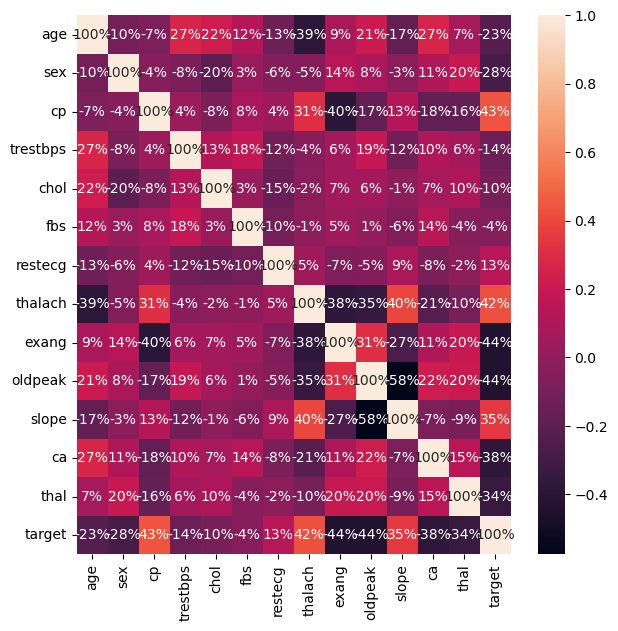

In [19]:

plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Splitting and Training Data</p>


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
<ul>
    <li>x --> Featrues</li>
    <li>y --> Target</li>

In [20]:
# separate the features and labels

# features or independent variables

x=df.drop('target', axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [21]:
# labels or dependent variable
y=df['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
<ul>
    <li>80% --> Training Data</li>
    <li>20% --> Testing Data</li>

In [22]:
# import the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

<h3>Scaling of data</h3>

In [23]:
# scaling the features to improve the performance of the model
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'.")

Scaler saved as 'scaler.pkl'.


<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Load the Model</p>


In [25]:
# import the model 

model=DecisionTreeClassifier(random_state=42)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

<a id="feature_removal"></a>
# <b><span style='color:#ff826e'></span><span style='color:red'>fit the training data into the model</span></b>

In [26]:
# train the model

model.fit(x_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Predicting</p>


In [27]:
# test the model
y_pred=model.predict(x_test_scaled)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [28]:
y_pred_prob=model.predict_proba(x_test_scaled)
y_pred_prob

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [29]:
y_prob=y_pred_prob[:,1]
y_prob

array([0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0.

<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Evaluating the Model</p>


In [30]:
 # For evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))  # Print classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Print confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))  # Print accuracy score
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))  # Print ROC-AUC score

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       135

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

Confusion Matrix:
 [[122   0]
 [  0 135]]
Accuracy: 1.0
ROC-AUC Score: 1.0


<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Plotting the Decision Tree</p>


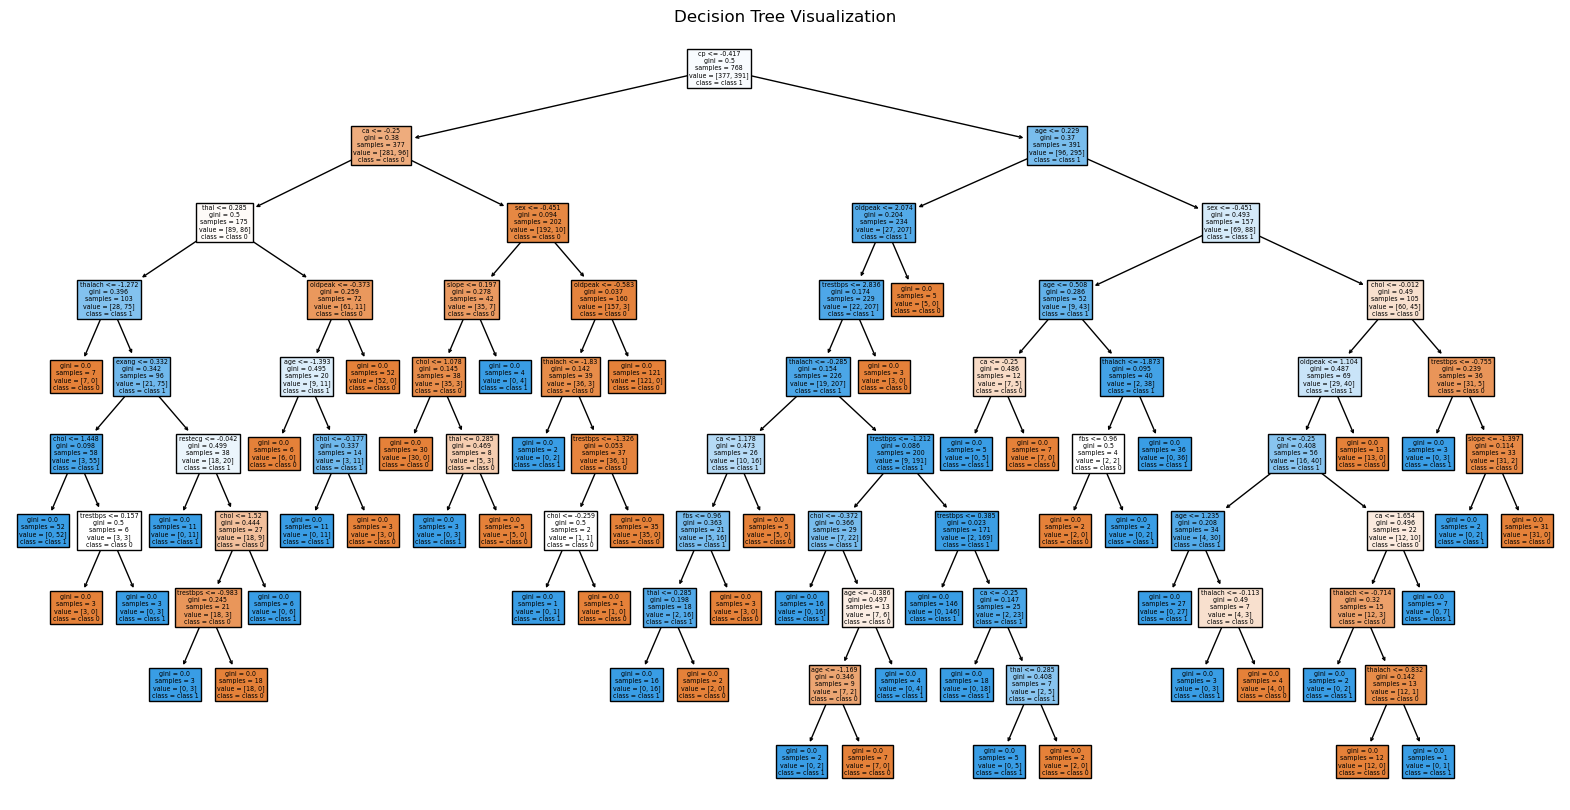

In [31]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=list(x.columns), class_names=['class 0', 'class 1'])
plt.title('Decision Tree Visualization')
plt.show()


<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Save the trained model</p>


In [32]:
# Save the trained model to a file
model_filename = 'heart_disease_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as heart_disease_model.pkl


In [37]:
input_x=pd.read_csv('input_x.csv')
input_x

,age: 55,sex: 1,chest_pain_type: 3,resting_blood_pressure: 140,cholesterol: 240,fasting_blood_sugar: 0,resting_ecg: 1,max_heart_rate: 150,exercise_induced_angina: 0,st_depression: 1.5,st_slope: 2,num_major_vessels: 0,thalassemia: 2


In [39]:
input_x_scaled = scaler.fit_transform(input_x)

ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required by StandardScaler.

In [35]:
# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# Verify the model by making a prediction
predictions = loaded_model.predict(x_test_scaled)
print(predictions)


[0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0
 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1
 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1
 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1]


In [2]:
pip install modelbit

Note: you may need to restart the kernel to use updated packages.


<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | Deploy the Model</p>

In [5]:
def my_lr_deployement(input_x):
      
    if isinstance(input_x, (int, float)):    ## check input type
        return model.predict([[input_x]])[0] ## prediction
        
    else:
        return None

In [26]:
mb.deploy(my_lr_deployement)

Uploading 'model': 100%|██████████| 2.78k/2.78k [00:03<00:00, 727B/s]


In [9]:
modelbit.get_inference(
  workspace="niharikagopalam",
  deployment="my_lr_deployement",
  data=input_x
)

Traceback (most recent call last):
  File "/tmp/runtime/modelbit_deployment_runtime.py", line 275, in grpcHandler
    outputRows = loadStateAndInvokeRuntime(apiHandler)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/runtime/modelbit_deployment_runtime.py", line 330, in loadStateAndInvokeRuntime
    outputRows = runMainFunc(apiHandler, inputRows)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/runtime/modelbit_deployment_runtime.py", line 378, in runMainFunc
    source = importlib.import_module(rtModuleName)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147,

ModelbitError: ModuleNotFoundError: No module named 'sklearn'

In [41]:
import modelbit, os

os.environ['MB_WORKSPACE_NAME'] = 'niharikagopalam'
os.environ['MB_API_KEY'] = 'heart'

mb = modelbit.login()